# VAR inference on a Real Public Dataset, Herold et al. (2020)

In this example, we will be using the GP imputator on a dataset available at [Herold et al., 2020](https://doi.org/10.1038/s41467-020-19006-2) to imputate missing data. Then, we are going to use the VAR inference method to infer the causal relationships between the variables in the time series. 

First, we will import the neccessary libraries and load the dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import seaborn as sns


from mimic.data_imputation.impute_GP import GPImputer
from mimic.model_infer.infer_VAR_bayes import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Reload the imputed data into a new DataFrame

imputed_data = pd.read_csv('imputed_data.csv')

imputed_data.head(15)

,days,Acidimicrobium,Acinetobacter,Albidiferax,Candidatus Microthrix,Chitinophaga pinensis,Dechloromonas,Haliscomenobacter,Intrasporangium,Leptospira,Other,Xanthomonas,mean abundance < 2%
0,0.0,8.322484,0.791870,6.383491,26.180838,7.055585,4.998287,15.142620,11.445072,4.742982,2.357318,0.853658,11.725795
1,1.0,8.265177,0.763703,6.362575,25.593890,7.081694,5.072711,15.397948,11.546582,4.791269,2.382206,0.864697,11.836536
2,2.0,8.180701,0.781881,6.330330,25.226861,7.127157,5.147886,15.663537,11.636934,4.833619,2.399779,0.879132,11.947293
3,3.0,8.078737,0.801890,6.290243,24.849371,7.185821,5.219273,15.926969,11.710476,4.868031,2.418784,0.894873,12.058067
4,4.0,7.969807,0.823758,6.246734,24.505012,7.249498,5.280679,16.172482,11.759176,4.892380,2.438263,0.909303,12.168858
5,5.0,7.863614,0.847488,6.204391,24.245813,7.309111,5.324508,16.382314,11.772278,4.904550,2.457029,0.919595,12.279667
6,6.0,7.770084,0.873055,6.167656,24.127242,7.355842,5.342460,16.538718,11.737040,4.902619,2.473734,0.923138,12.390494
7,7.0,7.700314,0.900405,6.140528,24.199845,7.382293,5.326927,16.626579,11.641157,4.885061,2.487002,0.918012,12.501338
8,8.0,7.664534,0.911291,6.125822,23.641355,7.383681,5.273044,16.636265,11.476739,4.850959,2.520630,0.903478,12.612201
9,9.0,7.666801,0.960073,6.124129,25.024940,7.358852,5.180566,16.565955,11.244474,4.800196,2.499159,0.880339,12.321359


And we can run the VAR inference method to infer the causal relationships between the variables in the time series.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [noise_stddev, x0, c2, tau, lam, A, noise_chol]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 4378 seconds.
There were 2793 divergences after tuning. Increase `target_accept` or reparameterize.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
A[0, 0]    1.000  0.000   1.000    1.000        0.0      0.0    2830.0   
A[0, 1]    0.011  0.001   0.009    0.012        0.0      0.0    3568.0   
A[0, 2]    0.010  0.000   0.010    0.011        0.0      0.0    2935.0   
A[0, 3]    0.008  0.001   0.007    0.009        0.0      0.0    3297.0   
A[0, 4]    0.010  0.000   0.010    0.011        0.0      0.0    4357.0   
...          ...    ...     ...      ...        ...      ...       ...   
A[12, 8]   0.006  0.004  -0.001    0.014        0.0      0.0    3223.0   
A[12, 9]   0.015  0.003   0.010    0.020        0.0      0.0    3712.0   
A[12, 10] -0.100  0.019  -0.136   -0.063        0.0      0.0    4900.0   
A[12, 11]  0.004  0.012  -0.017    0.029        0.0      0.0    2895.0   
A[12, 12]  1.009  0.006   0.998    1.021        0.0      0.0    2357.0   

           ess_tail  r_hat  
A[0, 0]      1838.0    1.0  
A[0, 1]      3593.0    1.0  
A[0, 2]      3814.0    1

c:\ProgramData\anaconda3\envs\MIMIC\Lib\site-packages\arviz\plots\plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (169) in plot_posterior, generating only 40 plots
  warnings.warn(


Results saved as:
NetCDF file: model_posterior_large_v2.nc
Data file: data_large_v2.npz


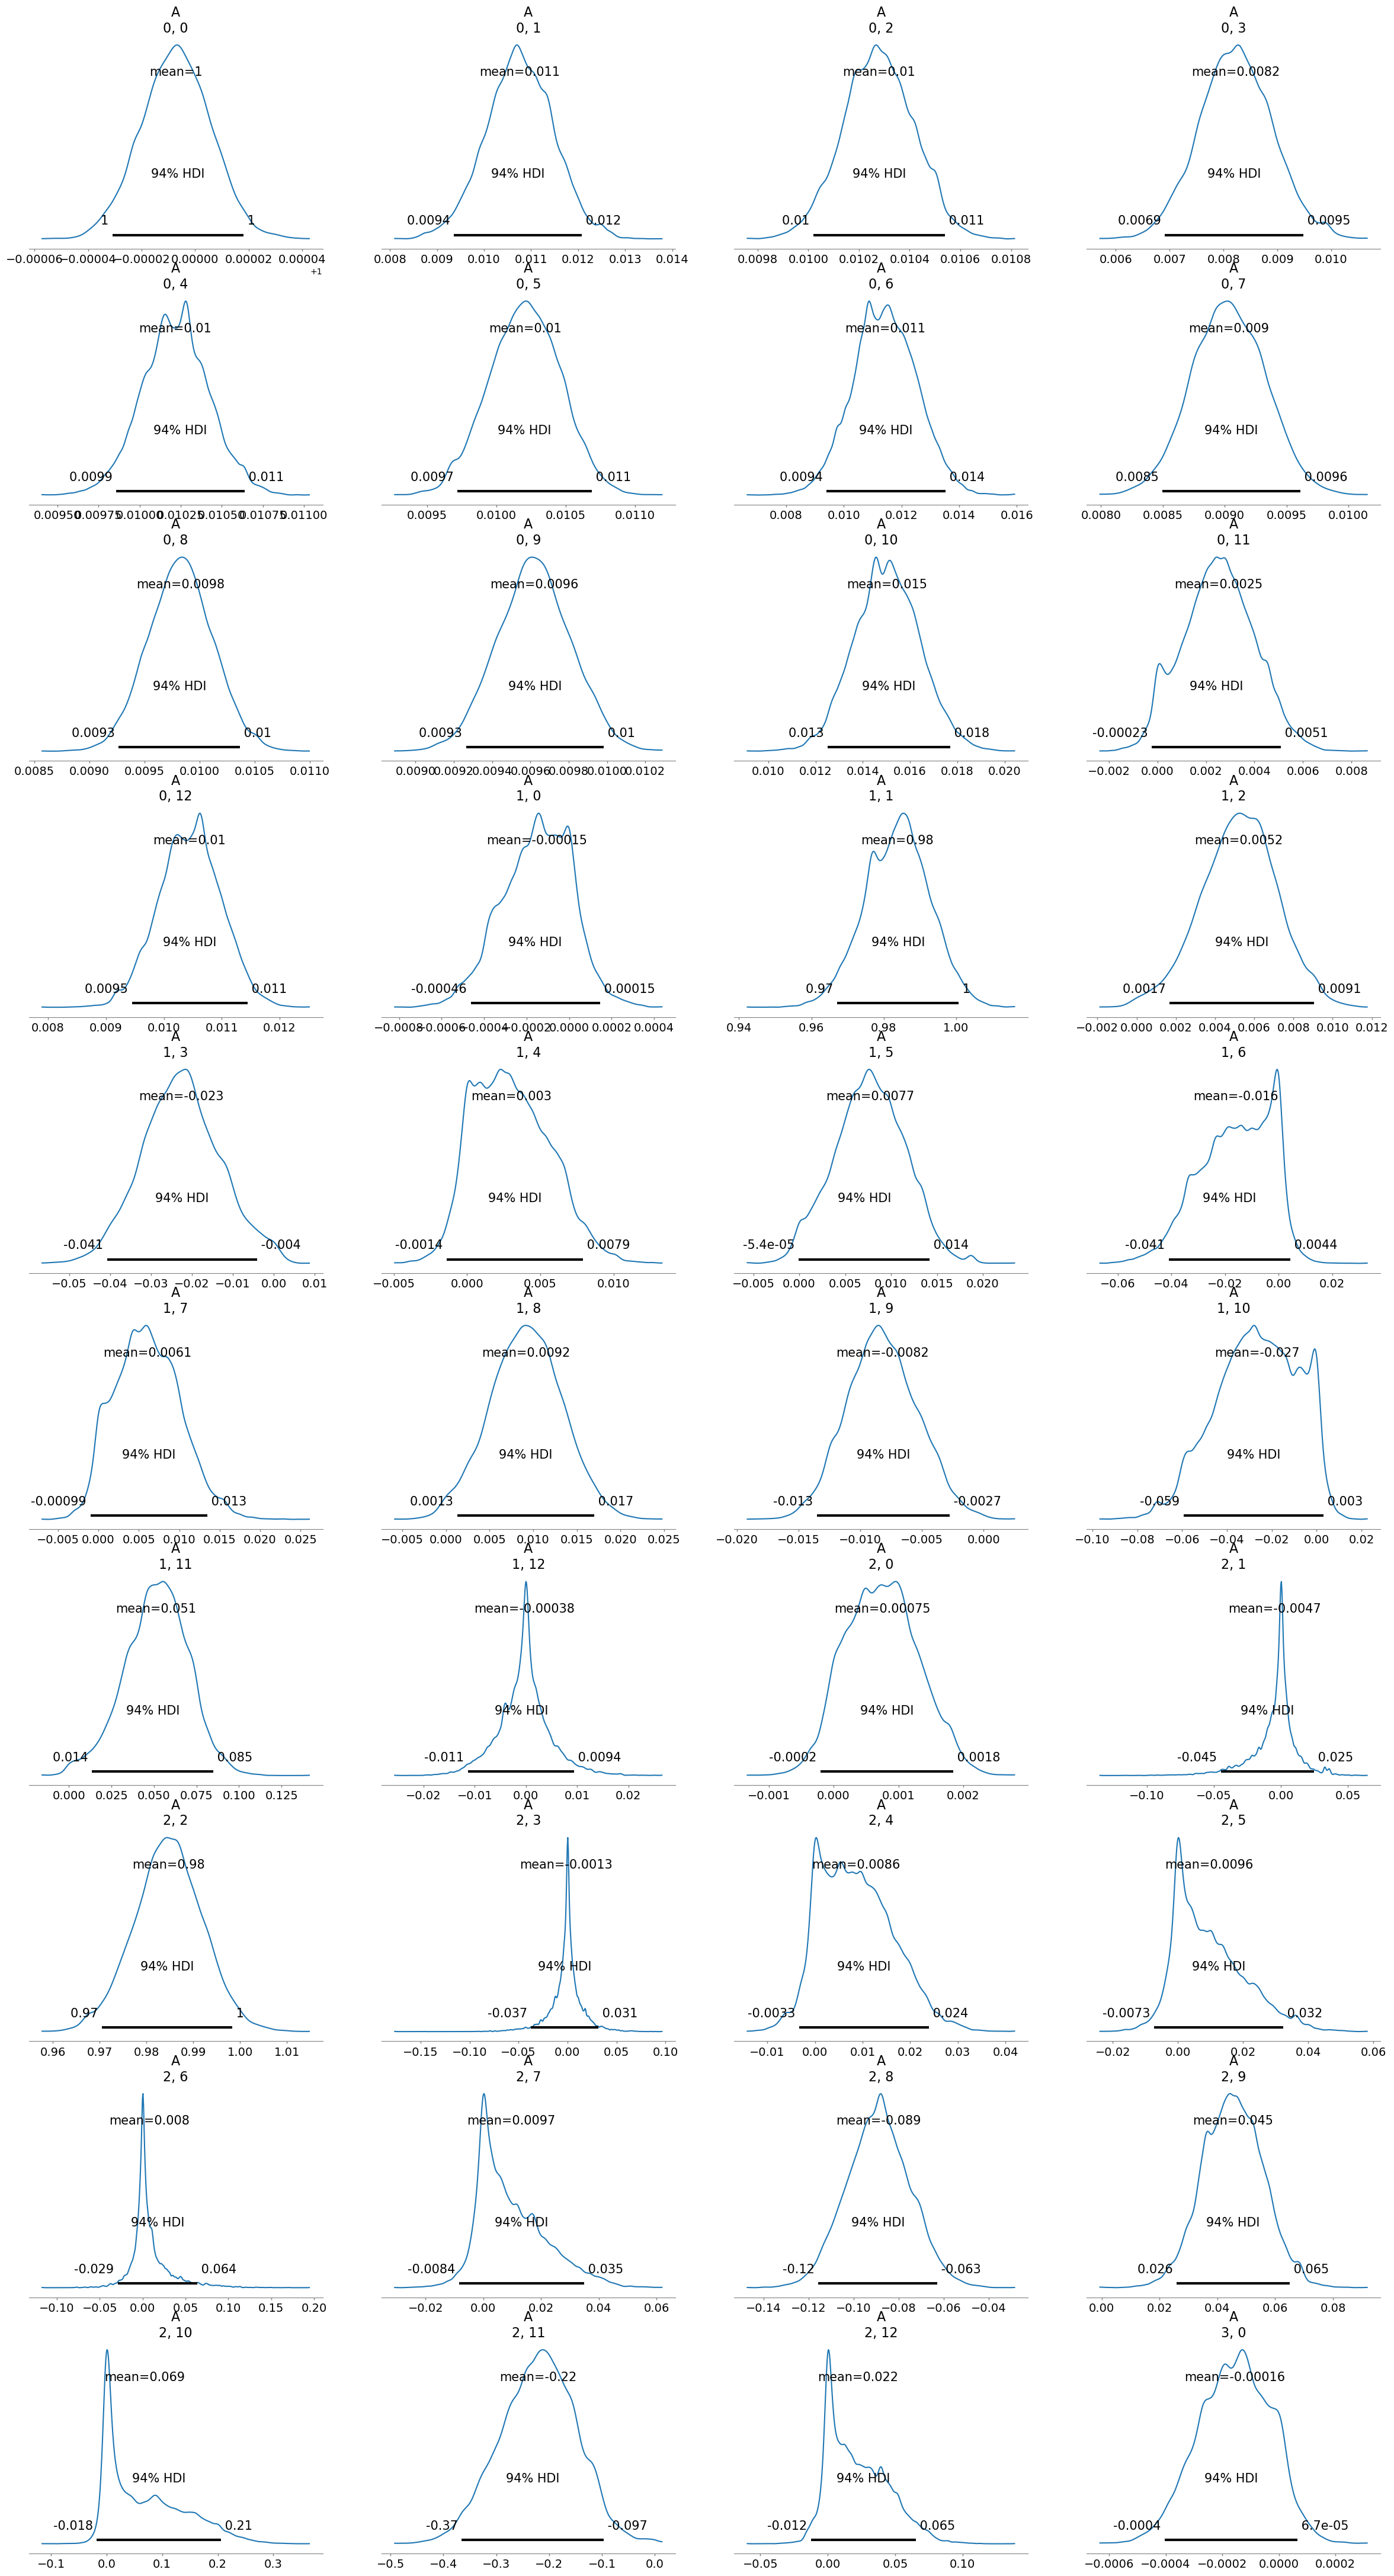

In [ ]:
infer = infer_VAR(imputed_data)
infer.debug = 'high'

infer.run_inference(method='large')

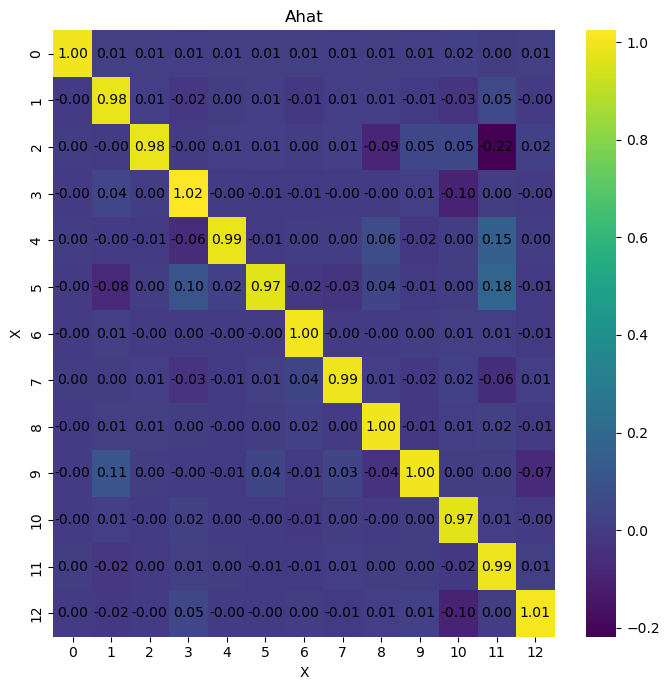

In [4]:
infer.posterior_analysis()

The results show an improvement (as seen by the r_hat values). However, if we look at the posterior distributions, some of them are wide, others are skewed, and some are multimodal. This indicates that the model is not a good fit for the data. Therefore, we are going to try different methods to improve the inference results.

First, we will test to see if the data is stationary or not using the `statsmodels` package. 

In [5]:
# Now we are going to check for stationarity in the data using adf and kpss tests from stasmodels library
# We will use the imputed data set

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value
    print(dfoutput)
    # if p-value is less than 0.05, we reject the null hypothesis and say that the data is stationary
    # print if the data is stationary or not
    if dftest[1] <= 0.05:
        print("ADF Test: Data is stationary")
    else:
        print("ADF Test: Data is not stationary")


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output[f"Critical Value ({key})"] = value
    print(kpss_output)
    # if p-value is greater than 0.05, we reject the null hypothesis and say that the data is stationary
    # print if the data is stationary or not
    if kpsstest[1] >= 0.05:
        print("KPSS test: Data is stationary")
    else:
        print("KPSS test: Data is not stationary")

In [6]:
# Check for stationarity in the data imputed_dataset (without the 'days' column)
imputed_data_reduced_no_days = imputed_data.drop(columns='days')
for genus in imputed_data_reduced_no_days.columns:
    print(genus)
    adf_test(imputed_data_reduced_no_days[genus])
    kpss_test(imputed_data_reduced_no_days[genus])
    print("\n")

Acidimicrobium
Results of Dickey-Fuller Test:
Test Statistic                  -2.694583
p-value                          0.074980
#Lags Used                      17.000000
Number of Observations Used    392.000000
Critical Value (1%)             -3.447142
Critical Value (5%)             -2.868941
Critical Value (10%)            -2.570713
dtype: float64
ADF Test: Data is not stationary
Results of KPSS Test:
Test Statistic            0.181567
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
KPSS test: Data is stationary


Acinetobacter
Results of Dickey-Fuller Test:
Test Statistic                  -1.760882
p-value                          0.400048
#Lags Used                      18.000000
Number of Observations Used    391.000000
Critical Value (1%)             -3.447186
Critical Value (5%)             -2.868960
C

C:\Users\User\AppData\Local\Temp\ipykernel_43880\3039934652.py:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
C:\Users\User\AppData\Local\Temp\ipykernel_43880\3039934652.py:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
C:\Users\User\AppData\Local\Temp\ipykernel_43880\3039934652.py:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
C:\Users\User\AppData\Local\Temp\ipykernel_43880\3039934652.py:33: InterpolationWarning: The test statistic is outside

These tests results show that most of the genus' samples is not stationary, which means that the data is not homoscedastic. This is a common problem in microbiome data, where the variance of the data is not constant across the samples. This is a problem for most imputation methods, as they assume that the data is homoscedastic.

To change this, we will be using a detrending method to make the data stationary by differencing the data. This will allow us to use the VAR inference method to impute the parameters of interaction. 

It is one of the simplest methods for detrending a time series. A new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

We can see the results of inferring the differenciated data. The results are not much better than before. So now, we are going to try one last method to improve the inference results. We are going use `statsmodels` to infer the relationships between the variables in the time series using a VAR model, then use the predicted posterior distributions as priors for the inference method and observe the results.

In [7]:
from statsmodels.tsa.api import VAR

In [8]:
# create a pandas dataframe of the original imputed data_set with days as the index
imputed_data.set_index('days', inplace=True)

In [9]:
# make VAR model with the imputed data set and statsmodels library
model = VAR(imputed_data)
results = model.fit(maxlags=1, method='ml')

c:\ProgramData\anaconda3\envs\MIMIC\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
coefficients = results.params
covariance_matrix = results.sigma_u
intercepts = np.array(results.params.iloc[0])

# remove the first row of the coefficients matrix
coefficients = coefficients[1:]
# transpose the coefficients matrix
coefficients = coefficients.T

As we can see, the results are much better than before. This is because bayesian VAR inference method works much better with the predicted posterior distributions as priors. This is because the predicted posterior distributions offer a better estimate of the parameters of interaction between the variables in the time series which the bayesian VAR inference method can use to infer the causal relationships between the variables in the time series.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [noise_stddev, x0, c2, tau, lam, A]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 5634 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 4053 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


            mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
A[0, 0]    0.963  0.0   0.963    0.963        0.0      0.0     558.0   
A[0, 1]   -0.005  0.0  -0.005   -0.005        0.0      0.0     884.0   
A[0, 2]   -0.033  0.0  -0.033   -0.033        0.0      0.0     780.0   
A[0, 3]   -0.008  0.0  -0.008   -0.008        0.0      0.0      20.0   
A[0, 4]   -0.004  0.0  -0.004   -0.004        0.0      0.0     667.0   
...          ...  ...     ...      ...        ...      ...       ...   
A[11, 7]   0.020  0.0   0.020    0.020        0.0      0.0     121.0   
A[11, 8]   0.027  0.0   0.027    0.027        0.0      0.0    1609.0   
A[11, 9]  -0.101  0.0  -0.101   -0.101        0.0      0.0     943.0   
A[11, 10]  0.020  0.0   0.020    0.020        0.0      0.0    1028.0   
A[11, 11]  1.020  0.0   1.020    1.020        0.0      0.0    1107.0   

           ess_tail  r_hat  
A[0, 0]       168.0   1.03  
A[0, 1]       504.0   1.03  
A[0, 2]       380.0   1.05  
A[0, 3]        16.0

c:\ProgramData\anaconda3\envs\MIMIC\Lib\site-packages\arviz\plots\plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (144) in plot_posterior, generating only 40 plots
  warnings.warn(


Results saved as:
NetCDF file: model_posterior_large_v3.nc
Data file: data_large_v3.npz


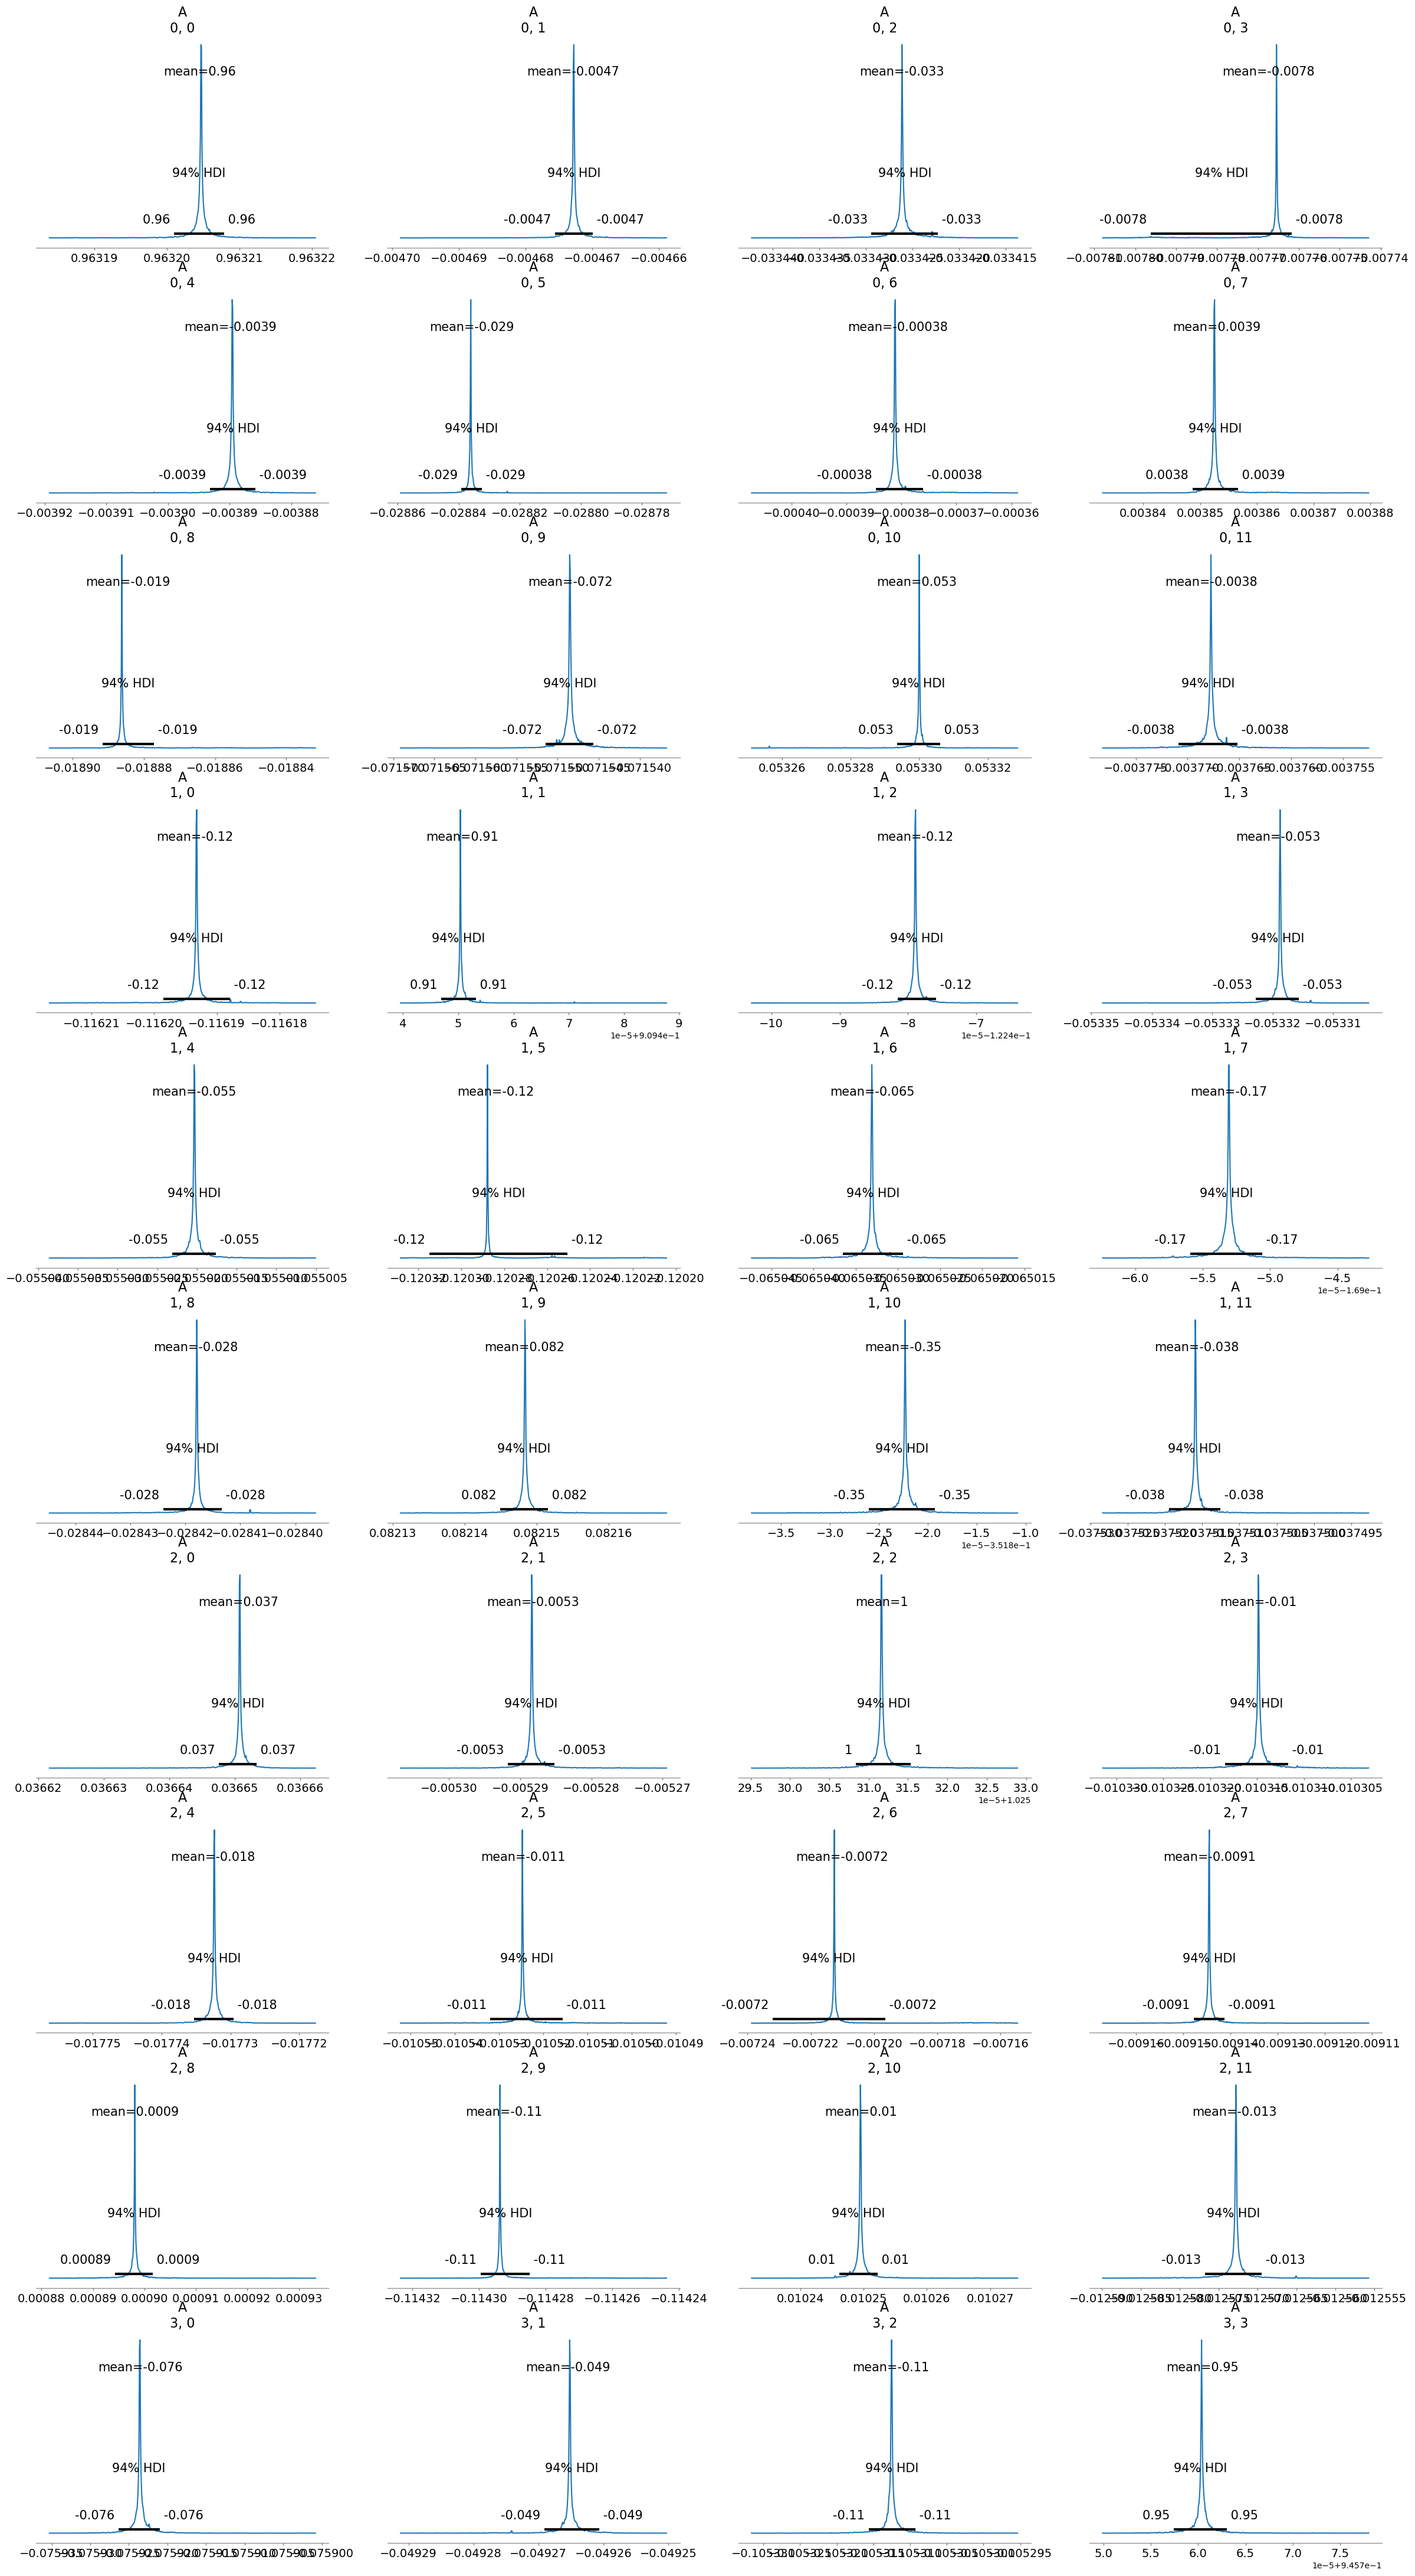

In [ ]:
# do the same for run_inference_large
infer9 = infer_VAR(imputed_data, coefficients, intercepts, covariance_matrix)
infer9.debug = "high"
infer9.run_inference(method='large')

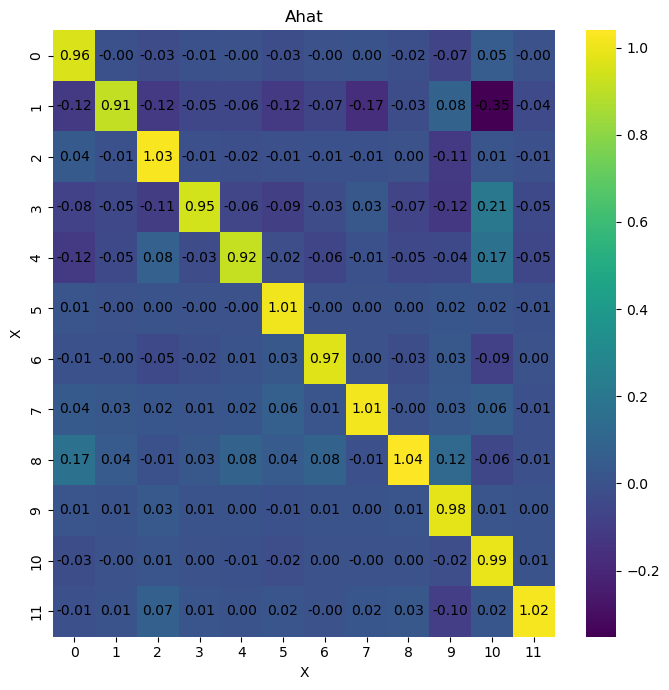

In [12]:
infer9.posterior_analysis()